In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import lanelet2
from lanelet2.core import (AllWayStop, AttributeMap, BasicPoint2d,
                            BoundingBox2d, Lanelet, LaneletMap,
                            LaneletWithStopLine, LineString2d, LineString3d, Point2d, Point3d,
                            RightOfWay, TrafficLight, getId)
from lanelet2.projection import (UtmProjector, MercatorProjector,
                                    LocalCartesianProjector, GeocentricProjector)

import numpy as np
from util import *

import matplotlib.pyplot as plt
visualize = True

In [30]:
# Create Map container

lanelet_map = LaneletMap()

## First, we build the outerloop the run counter-clockwise

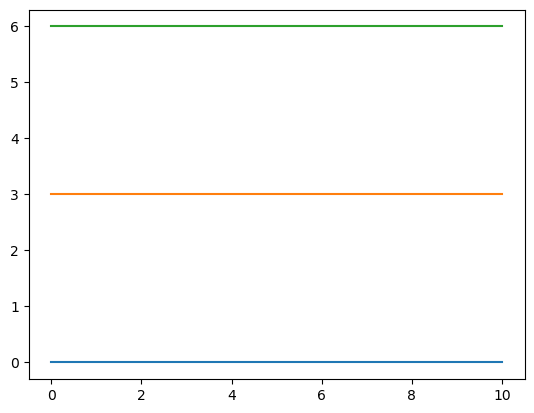

In [8]:
## load data
ol_cc_r_np = np.array([np.linspace(0, 10, 100), np.zeros(100)])
ol_cc_c_np = np.array([np.linspace(0, 10, 100), 3*np.ones(100)])
ol_cc_l_np = np.array([np.linspace(0, 10, 100), 6*np.ones(100)])

if visualize:
    plt.plot(ol_cc_r_np[0,:], ol_cc_r_np[1,:],  label='right')
    plt.plot(ol_cc_c_np[0,:], ol_cc_c_np[1,:],  label='center')
    plt.plot(ol_cc_l_np[0,:], ol_cc_l_np[1,:],  label='left')
    

In [55]:
# Build Line Strings
ol_cc_r_ls, ol_cc_r_start, ol_cc_r_end = gen_linestring(ol_cc_r_np, line_type='solid')
ol_cc_c_ls, ol_cc_c_start, ol_cc_c_end = gen_linestring(ol_cc_c_np, line_type='dashed')
ol_cc_l_ls, ol_cc_l_start, ol_cc_l_end = gen_linestring(ol_cc_l_np, line_type='solid_solid')

# build lanelets
ol_cc_r_lanelet = gen_lanelet(ol_cc_c_ls, ol_cc_r_ls)
print("ol_cc_r_lanelet: ", ol_cc_r_lanelet.id)
ol_cc_l_lanelet = gen_lanelet(ol_cc_l_ls, ol_cc_c_ls)
print("ol_cc_l_lanelet: ", ol_cc_l_lanelet.id)

lanelet_map.add(ol_cc_r_lanelet)
lanelet_map.add(ol_cc_l_lanelet)

ol_cc_r_lanelet:  4751
ol_cc_l_lanelet:  4752


In [54]:
traffic_rules = lanelet2.traffic_rules.create(lanelet2.traffic_rules.Locations.Germany,
                                                lanelet2.traffic_rules.Participants.Vehicle)

graph = lanelet2.routing.RoutingGraph(lanelet_map, traffic_rules) 
error = graph.checkValidity()
print(graph)

print(graph.(ol_cc_r_lanelet, 0))

